# Setting

In [1]:
from pf_utils import BacktestManager

WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


## Implement

### class

### test

# Universe

In [2]:
import FinanceDataReader as fdr
import pandas as pd
#import warnings

#warnings.filterwarnings(action='ignore', category=FutureWarning)

In [3]:
path_data = 'data'

In [4]:
#stocks = fdr.StockListing('KOSPI-DESC') # KOSPI
#stocks = fdr.StockListing('KOSPI') # 종목수는 2022년 10월 25일 기준?
#etfs = fdr.StockListing('ETF/KR') # 한국 ETF 전종목
tickers_200 = fdr.SnapDataReader('KRX/INDEX/STOCK/1028') # 코스피 200

In [5]:
%%time
#tickers = tickers_200.Code
#df_200 = fdr.DataReader(tickers, '2021')

CPU times: user 2 μs, sys: 1e+03 ns, total: 3 μs
Wall time: 4.53 μs


In [6]:
#file = 'df_200.csv'
#df_200.to_csv(f'{path_data}/{file}')

In [7]:
file = 'df_200.csv'
df_200 = pd.read_csv(f'{path_data}/{file}', parse_dates=[0], index_col=[0])

In [8]:
df_200.tail()

,051600,001040,001440,316140,004800,028260,192080,383220,036460,185750,...,011170,004020,012750,032830,003620,039130,105560,021240,192820,009420
Date,,,,,,,,,,,,,,,,,,,,,
2024-06-19,37200,124800,15700,14140,57300,135400,44500,65100.0,55800,100400,...,112300,28950,58700,87400,5340,57000,78900,55200,187100,33000
2024-06-20,36900,122600,15610,14360,57200,135100,45700,64400.0,63500,101600,...,120500,29350,59500,87600,5310,57400,80800,55900,180000,33000
2024-06-21,37200,125500,16240,14240,57800,135300,45400,63000.0,61900,94600,...,115000,29600,57600,87000,5250,59600,78600,58200,187000,33350
2024-06-24,37300,117000,15680,14490,57200,135900,45750,62200.0,63500,95800,...,115000,28950,56800,87000,5170,58500,80000,58000,184100,32300
2024-06-25,37200,117500,15800,14580,57200,135400,47050,62800.0,62000,96600,...,117400,29200,57600,87800,5210,59000,79900,59700,186700,32600


# BacktestManager

## create class

In [9]:
kwargs_bm = dict(
    align_axis = 1, 
    initial_capital = 10000000,
    commissions = 0
)
bm = BacktestManager(df_200, **kwargs_bm)

## define strategy by keywords

In [10]:
kwargs_build = dict(
    name = 'strategy1',
    freq = 'M', select = 'Momentum', weigh = 'ERC',
    n_equities=5, lookback=12, lag=0
)
bm.build(**kwargs_build)

15 equities removed for shorter periods (7.5%)


In [11]:
kwargs_build = dict(
    name = 'strategy2',
    freq = 'M', select = 'Momentum', weigh = 'equally',
    n_equities=5, lookback=12, lag=0
)
bm.build(**kwargs_build)

15 equities removed for shorter periods (7.5%)


## buy and hold

In [12]:
bm.buy_n_hold('buy&hold', weights='005930')

15 equities removed for shorter periods (7.5%)
RunOnce selected


## baseline

In [13]:
name='KOSPI' 
ticker = '069500'

start = df_200.index[0].strftime('%Y-%m-%d')
end = df_200.index[-1].strftime('%Y-%m-%d')
df_baseline = fdr.DataReader(ticker, start, end)
df_baseline = df_baseline.Close.rename(name)

bm.benchmark(df_baseline, name=name, **kwargs_bm)

RunOnce selected


## run backtest

100%|█████████████████████████████████████████████████████████████████| 4/4 [00:02<00:00,  1.66it/s]


Returning stats


,strategy1,strategy2,buy&hold,KOSPI
start,2021-01-03 00:00:00,2021-01-03 00:00:00,2021-01-03 00:00:00,2021-01-03 00:00:00
end,2024-06-25 00:00:00,2024-06-25 00:00:00,2024-06-25 00:00:00,2024-06-25 00:00:00
total_return,5.52554,5.134872,-0.0276,0.014736
cagr,0.715801,0.685583,-0.008023,0.004219
calmar,2.824258,2.714455,-0.019083,0.012322
max_drawdown,-0.253448,-0.252568,-0.420438,-0.342432
avg_drawdown,-0.058439,-0.070121,-0.22031,-0.08767
avg_drawdown_days,18.475,20.805556,631.0,209.0
daily_vol,0.395361,0.402491,0.225217,0.17231
daily_sharpe,1.591989,1.525453,0.075251,0.110941


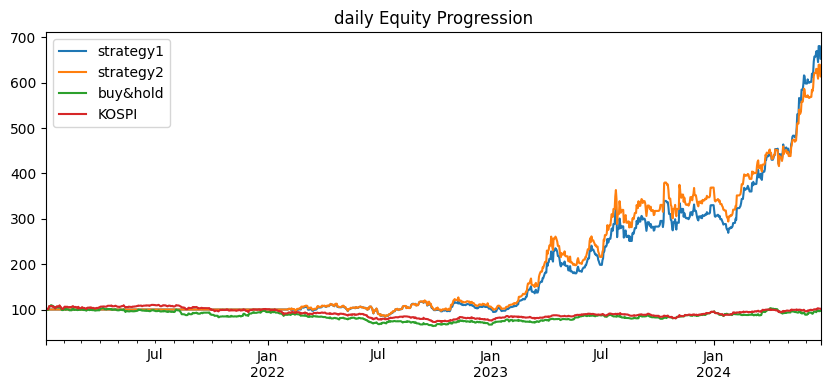

In [14]:
bm.run(figsize=(10,4))

## define strategy for debugging or more combinations

In [15]:
import bt

name='WeighERC does not work with SelectRandomly'

algos = [
    bt.algos.SelectAll(),

    bt.algos.SelectRandomly(n=5),
    #bt.algos.SelectMomentum(n=5, lookback=pd.DateOffset(months=12)),
    
    bt.algos.RunMonthly(),

    #bt.algos.SelectHasData(lookback=pd.DateOffset(months=12)),
    bt.algos.WeighERC(lookback=pd.DateOffset(months=12)),
    #bt.algos.WeighEqually(),
    
    bt.algos.Rebalance()
]

bm4d = BacktestManager(df_200, **kwargs_bm)
bm4d.build(name=name, algos=algos)
_ = bm4d.run(figsize=(10,4))

15 equities removed for shorter periods (7.5%)


  0%|                                                                         | 0/1 [00:00<?, ?it/s]

ERROR: Found array with 0 sample(s) (shape=(0, 5)) while a minimum of 1 is required by LedoitWolf.


## Post-processing

In [16]:
bm.get_stats(sort_by='monthly_sharpe')

,strategy1,strategy2,KOSPI,buy&hold
start,2021-01-03 00:00:00,2021-01-03 00:00:00,2021-01-03 00:00:00,2021-01-03 00:00:00
end,2024-06-25 00:00:00,2024-06-25 00:00:00,2024-06-25 00:00:00,2024-06-25 00:00:00
total_return,5.52554,5.134872,0.014736,-0.0276
cagr,0.715801,0.685583,0.004219,-0.008023
calmar,2.824258,2.714455,0.012322,-0.019083
max_drawdown,-0.253448,-0.252568,-0.342432,-0.420438
avg_drawdown,-0.058439,-0.070121,-0.08767,-0.22031
avg_drawdown_days,18.475,20.805556,209.0,631.0
daily_vol,0.395361,0.402491,0.17231,0.225217
daily_sharpe,1.591989,1.525453,0.110941,0.075251


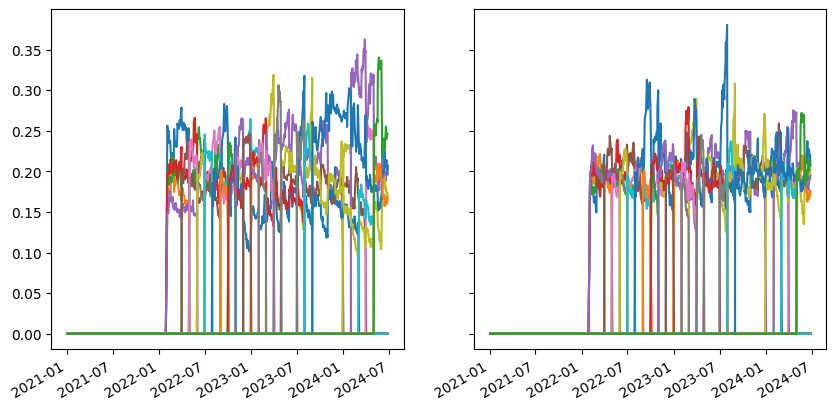

In [17]:
pf = ['strategy1', 'strategy2']
bm.plot_security_weights(pf, legend=False)

In [18]:
bm.get_historical(pf).tail()

,strategy1,strategy2
2024-06-19,656.17055,617.99816
2024-06-20,645.05855,608.48316
2024-06-21,680.33155,639.26416
2024-06-24,652.15255,613.34016
2024-06-25,652.55405,613.48716


In [19]:
bm.get_transactions(pf[1]).tail(10)

price  quantity
Date       Security                    
2024-05-02 010120    167500.0      53.0
           022100     40250.0      35.0
           042700    133000.0       4.0
           047050     46200.0    -170.0
           079550    178900.0     -50.0
           267260    239500.0     -12.0
2024-06-03 003230    587000.0     -10.0
           022100     35650.0      98.0
           042700    146700.0      10.0
           267260    291000.0       2.0

# Momentum

### Casestudy

In [10]:
kwargs_bm = dict(
    align_axis = 1, 
    initial_capital = 10000000,
    commissions = 0
)

In [11]:
kwargs_build = dict(
    select = 'Momentum', weigh = 'ERC',
)

#### Lookback

In [41]:
bm = BacktestManager(df_200, **kwargs_bm)

In [42]:
n_equities = 5
#lookback = 12
lag = 0
freq='M'

for lookback in [3, 6, 12, 24]:
    bm.build(name=f'{lookback} month lookback',
             freq=freq, n_equities=n_equities, lookback=lookback, lag=lag,
             **kwargs_build)

15 equities removed for shorter periods (7.5%)
15 equities removed for shorter periods (7.5%)
15 equities removed for shorter periods (7.5%)
15 equities removed for shorter periods (7.5%)


100%|█████████████████████████████████████████████████████████████████| 4/4 [00:04<00:00,  1.14s/it]

Returning stats


,3 month lookback,6 month lookback,12 month lookback,24 month lookback
start,2021-01-03 00:00:00,2021-01-03 00:00:00,2021-01-03 00:00:00,2021-01-03 00:00:00
end,2024-06-25 00:00:00,2024-06-25 00:00:00,2024-06-25 00:00:00,2024-06-25 00:00:00
total_return,1.230796,1.835032,5.52554,4.44036
cagr,0.259782,0.349763,0.715801,0.628291
calmar,0.585568,0.89205,2.824258,2.363437
max_drawdown,-0.443641,-0.392089,-0.253448,-0.265838
avg_drawdown,-0.13315,-0.102267,-0.058439,-0.061976
avg_drawdown_days,92.833333,42.695652,18.475,16.44
daily_vol,0.40927,0.382443,0.395361,0.349452
daily_sharpe,0.779544,0.990737,1.591989,1.598254


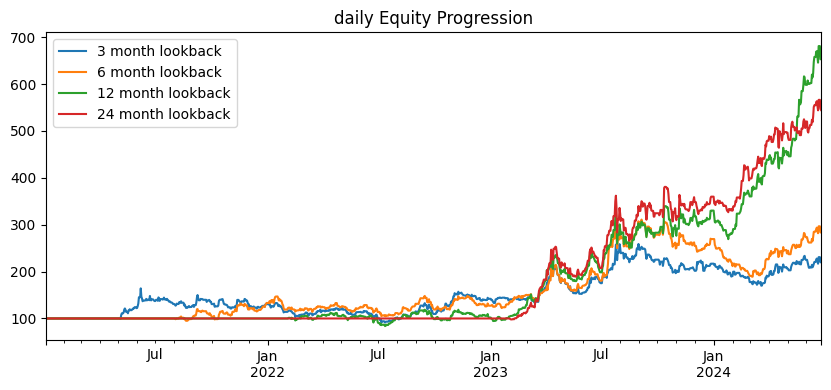

In [43]:
bm.run(figsize=(10,4))

#### Lag

In [44]:
bm = BacktestManager(df_200, **kwargs_bm)

In [45]:
n_equities = 5
lookback = 12
#lag = 0
freq='M'

for lag in [0, 7, 14, 30]:
    bm.build(name=f'{lag} day lag',
             freq=freq, n_equities=n_equities, lookback=lookback, lag=lag,
             **kwargs_build)

15 equities removed for shorter periods (7.5%)
15 equities removed for shorter periods (7.5%)
15 equities removed for shorter periods (7.5%)
15 equities removed for shorter periods (7.5%)


100%|█████████████████████████████████████████████████████████████████| 4/4 [00:04<00:00,  1.13s/it]

Returning stats


,0 day lag,7 day lag,14 day lag,30 day lag
start,2021-01-03 00:00:00,2021-01-03 00:00:00,2021-01-03 00:00:00,2021-01-03 00:00:00
end,2024-06-25 00:00:00,2024-06-25 00:00:00,2024-06-25 00:00:00,2024-06-25 00:00:00
total_return,5.52554,4.521679,4.991356,3.715411
cagr,0.715801,0.635259,0.674138,0.562629
calmar,2.824258,2.339347,2.500326,1.790534
max_drawdown,-0.253448,-0.271554,-0.26962,-0.314224
avg_drawdown,-0.058439,-0.057543,-0.062687,-0.057738
avg_drawdown_days,18.475,16.795455,19.128205,19.657895
daily_vol,0.395361,0.384598,0.390097,0.374466
daily_sharpe,1.591989,1.497942,1.54377,1.404258


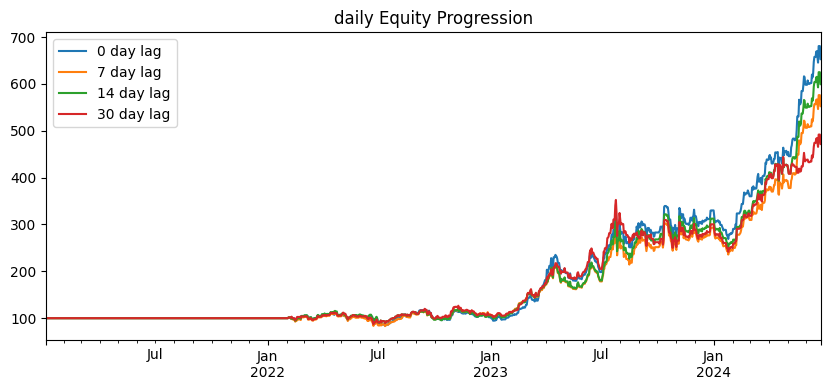

In [46]:
bm.run(figsize=(10,4))

#### Number of equities

In [12]:
bm = BacktestManager(df_200, **kwargs_bm)

In [13]:
#n_equities = 5
lookback = 12
lag = 0
freq='M'

for n_equities in [2, 5, 10]:
    bm.build(name=f'{n_equities} equities',
             freq=freq, n_equities=n_equities, lookback=lookback, lag=lag,
             **kwargs_build)

15 equities removed for shorter periods (7.5%)
15 equities removed for shorter periods (7.5%)
15 equities removed for shorter periods (7.5%)


100%|█████████████████████████████████████████████████████████████████| 3/3 [00:03<00:00,  1.10s/it]

Returning stats


,2 equities,5 equities,10 equities
start,2021-01-03 00:00:00,2021-01-03 00:00:00,2021-01-03 00:00:00
end,2024-06-25 00:00:00,2024-06-25 00:00:00,2024-06-25 00:00:00
total_return,4.359419,5.52554,2.34073
cagr,0.621281,0.715801,0.415059
calmar,1.834426,2.824258,1.947466
max_drawdown,-0.338679,-0.253448,-0.213128
avg_drawdown,-0.130357,-0.058439,-0.056089
avg_drawdown_days,40.1,18.475,28.444444
daily_vol,0.528656,0.395361,0.278328
daily_sharpe,1.195613,1.591989,1.413894


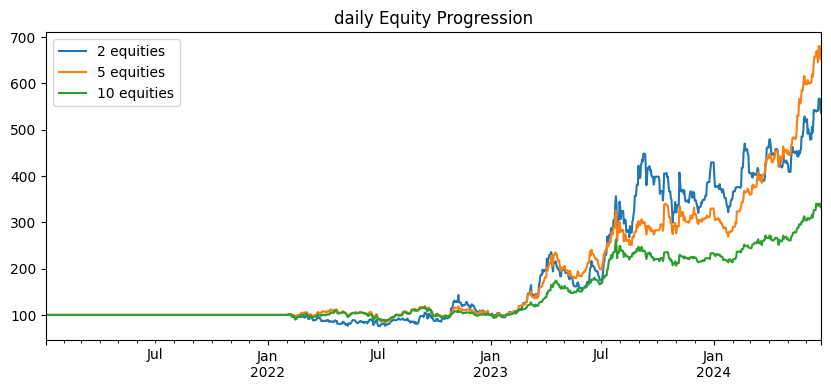

In [14]:
bm.run(figsize=(10,4))

#### Weighting

In [50]:
bm = BacktestManager(df_200, **kwargs_bm)

In [51]:
kwargs_build = dict(
    select = 'Momentum', 
    freq='M', n_equities=5, lookback=12, lag=0
)

name='ERC'
bm.build(name=name, weigh=name, **kwargs_build)

name='InvVol'
bm.build(name=name, weigh=name, **kwargs_build)

15 equities removed for shorter periods (7.5%)
15 equities removed for shorter periods (7.5%)


100%|██████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 20610.83it/s]

Returning stats


,ERC,InvVol
start,2021-01-03 00:00:00,2021-01-03 00:00:00
end,2024-06-25 00:00:00,2024-06-25 00:00:00
total_return,5.52554,4.997672
cagr,0.715801,0.674646
calmar,2.824258,2.569999
max_drawdown,-0.253448,-0.262508
avg_drawdown,-0.058439,-0.064304
avg_drawdown_days,18.475,21.083333
daily_vol,0.395361,0.394928
daily_sharpe,1.591989,1.530189


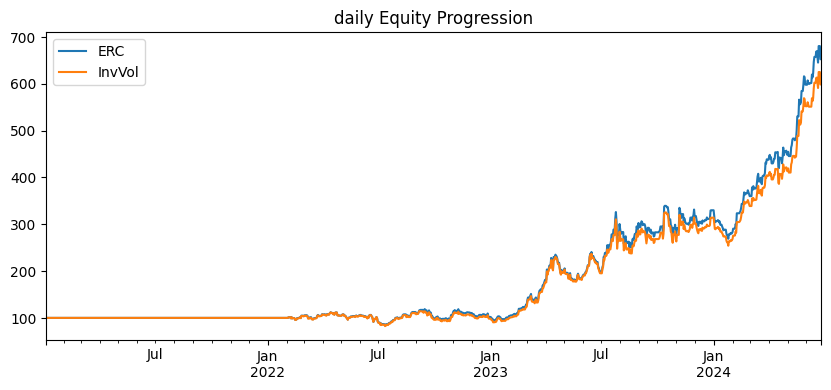

In [53]:
bm.run(figsize=(10,4))

## K-ratio

In [17]:
kwargs_bm = dict(
    align_axis = 1, 
    initial_capital = 10000000,
    commissions = 0
)
bm = BacktestManager(df_200, **kwargs_bm)

In [18]:
kwargs_build = dict(
    select = 'K-ratio', weigh = 'ERC',
    freq='M', n_equities=5, lag=0
)

for lookback in [3, 6, 12]:
    bm.build(name=f'K-ratio: lookback {lookback}M',
             lookback=lookback, **kwargs_build)

15 equities removed for shorter periods (7.5%)
15 equities removed for shorter periods (7.5%)
15 equities removed for shorter periods (7.5%)


100%|█████████████████████████████████████████████████████████████████| 3/3 [03:28<00:00, 69.46s/it]

Returning stats
CPU times: user 3min 28s, sys: 58.9 ms, total: 3min 28s
Wall time: 3min 28s


,K-ratio: lookback 3M,K-ratio: lookback 6M,K-ratio: lookback 12M
start,2021-01-03 00:00:00,2021-01-03 00:00:00,2021-01-03 00:00:00
end,2024-06-25 00:00:00,2024-06-25 00:00:00,2024-06-25 00:00:00
total_return,0.429143,0.157677,1.315551
cagr,0.108242,0.043043,0.273376
calmar,0.378196,0.158068,0.927906
max_drawdown,-0.286206,-0.272304,-0.294616
avg_drawdown,-0.061271,-0.074155,-0.044881
avg_drawdown_days,57.736842,92.909091,27.964286
daily_vol,0.247263,0.216101,0.244289
daily_sharpe,0.547824,0.307164,1.132774


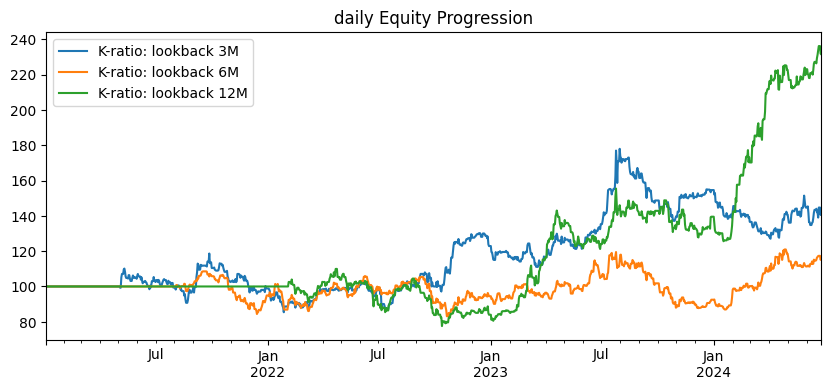

In [19]:
%%time
bm.run(figsize=(10,4))

In [20]:
kwargs_build = dict(
    name='Simple', select = 'Momentum', weigh = 'ERC',
    freq='M', n_equities=5, lookback=12
)
bm.build(**kwargs_build)

15 equities removed for shorter periods (7.5%)


100%|█████████████████████████████████████████████████████████████████| 2/2 [00:01<00:00,  1.63it/s]

Returning stats


,K-ratio: lookback 12M,Simple
start,2021-01-03 00:00:00,2021-01-03 00:00:00
end,2024-06-25 00:00:00,2024-06-25 00:00:00
total_return,1.315551,5.52554
cagr,0.273376,0.715801
calmar,0.927906,2.824258
max_drawdown,-0.294616,-0.253448
avg_drawdown,-0.044881,-0.058439
avg_drawdown_days,27.964286,18.475
daily_vol,0.244289,0.395361
daily_sharpe,1.132774,1.591989


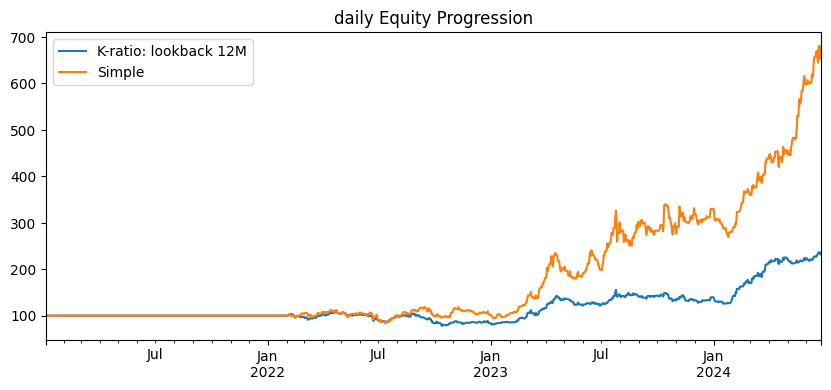

In [21]:
pf_list = ['Simple', 'K-ratio: lookback 12M']
bm.run(pf_list, figsize=(10,4))